<a href="https://colab.research.google.com/github/wahyunh10/Project-Ecommerce-Shipping-Clasification-Modeling/blob/main/Stage_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [2]:
#code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

# **Load Dataset**

In [3]:
#code
df = pd.read_csv('Full_data.csv')
dfSel = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [6]:
df[nums].describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,3.567597,13.373216,210.196836,3634.016729,0.596691
std,1.141490,1.413603,1.522860,16.205527,48.063272,1635.377251,0.490584
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.500000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000,1.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000,1.000000


Some observations:

* The `Customer_care_calls`, `customer_rating`, and `Cost_of_the_Product` columns appear to have a fairly symmetrical distribution (mean and median are not much different)
* The `Discount_offered` and `Prior_purchases` columns appear to be skewed to the right (long-right tail)
* Column `Reached.on.Time_Y.N` is boolean/binary

In [7]:
df[cats].describe()

,Mode_of_Shipment,Product_importance,Gender,Warehouse_block
count,10999,10999,10999,10999
unique,3,3,2,5
top,Ship,low,F,F
freq,7462,5297,5545,3666


Some observations:

* For the category of **female gender** is more dominant,
* For the product importance category, it is dominated by the **low category**
* For the shipping mode category is dominated by **shipping by ship** 
* For warehouse_block is dominated by **block F**
* All unique values for each category are still in the normal category, around **2-5 unique values**

In [8]:
data_clean = df.copy()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# **Data Cleansing**
**Handle missing values**

In [9]:
#code
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Missing values do not need to be handled because there are no missing values for each feature

**Handle duplicated data**

In [10]:
#code
df.duplicated().sum()

0

In [11]:
df.duplicated(subset=['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product',
                      'Weight_in_gms', 'Reached.on.Time_Y.N', 'Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']).sum()

0

Duplicated Data does not need to be handled because there is no duplicated data on each feature

**Handle outliers**

In [12]:
#code
df2 = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

filtered_entries1 = np.array([True] * len(df2))

for col in nums:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries1 = (zscore < 3) & filtered_entries1 # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries1] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10642


Number of rows before filtering outliers: 10999

Number of rows after filtering outliers: 10642

Using z-score for each existing feature **removes about 3% of outlier data** so the data becomes 10642. because we consider every data valuable **so we use z-score** to not waste too much data


**Feature transformation**

In [13]:
#code
df2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,5570.347773,4.065683,2.989194,210.578557,3.463447,12.528660,3646.514189,0.590303
std,3159.806013,1.145348,1.412344,48.077818,1.288855,14.992539,1639.849048,0.491801
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2881.250000,3.000000,2.000000,170.000000,3.000000,4.000000,1837.000000,0.000000
50%,5604.500000,4.000000,3.000000,215.000000,3.000000,7.000000,4172.000000,1.000000
75%,8300.750000,5.000000,4.000000,251.000000,4.000000,10.000000,5063.750000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,8.000000,61.000000,7846.000000,1.000000


In [14]:
# Normalisasi :
df2['Customer_rating'] = MinMaxScaler().fit_transform(df2['Customer_rating'].values.reshape(len(df2), 1))

#Standarisasi :
df2['Customer_care_calls'] = StandardScaler().fit_transform(df2['Customer_care_calls'].values.reshape(len(df2), 1))
df2['Cost_of_the_Product'] = StandardScaler().fit_transform(df2['Cost_of_the_Product'].values.reshape(len(df2), 1))
df2['Prior_purchases'] = StandardScaler().fit_transform(df2['Prior_purchases'].values.reshape(len(df2), 1))
df2['Discount_offered'] = StandardScaler().fit_transform(df2['Discount_offered'].values.reshape(len(df2), 1))
df2['Weight_in_gms'] = StandardScaler().fit_transform(df2['Weight_in_gms'].values.reshape(len(df2), 1))

In [15]:
df2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10642.000000,1.064200e+04,10642.000000,1.064200e+04,1.064200e+04,1.064200e+04,1.064200e+04,10642.000000
mean,5570.347773,2.777540e-16,0.497298,-5.341423e-17,-1.068285e-16,2.136569e-17,6.409707e-17,0.590303
std,3159.806013,1.000047e+00,0.353086,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,0.491801
min,1.000000,-1.803627e+00,0.000000,-2.383302e+00,-1.135516e+00,-7.689960e-01,-1.613343e+00,0.000000
25%,2881.250000,-9.304889e-01,0.250000,-8.440579e-01,-3.595969e-01,-5.688870e-01,-1.103516e+00,0.000000
50%,5604.500000,-5.735048e-02,0.500000,9.196863e-02,-3.595969e-01,-3.687781e-01,3.204627e-01,1.000000
75%,8300.750000,8.157880e-01,0.750000,8.407899e-01,4.163217e-01,-1.686692e-01,8.642883e-01,1.000000
max,10999.000000,2.562065e+00,1.000000,2.068025e+00,3.519996e+00,3.233183e+00,2.561018e+00,1.000000


Some features are standardized to make it easier for modeling and also to make the features approach a normal distribution. especially 'customer_rating' is normalized because we already know the limit of the rating, which is 1-5 so it only needs to be normalized

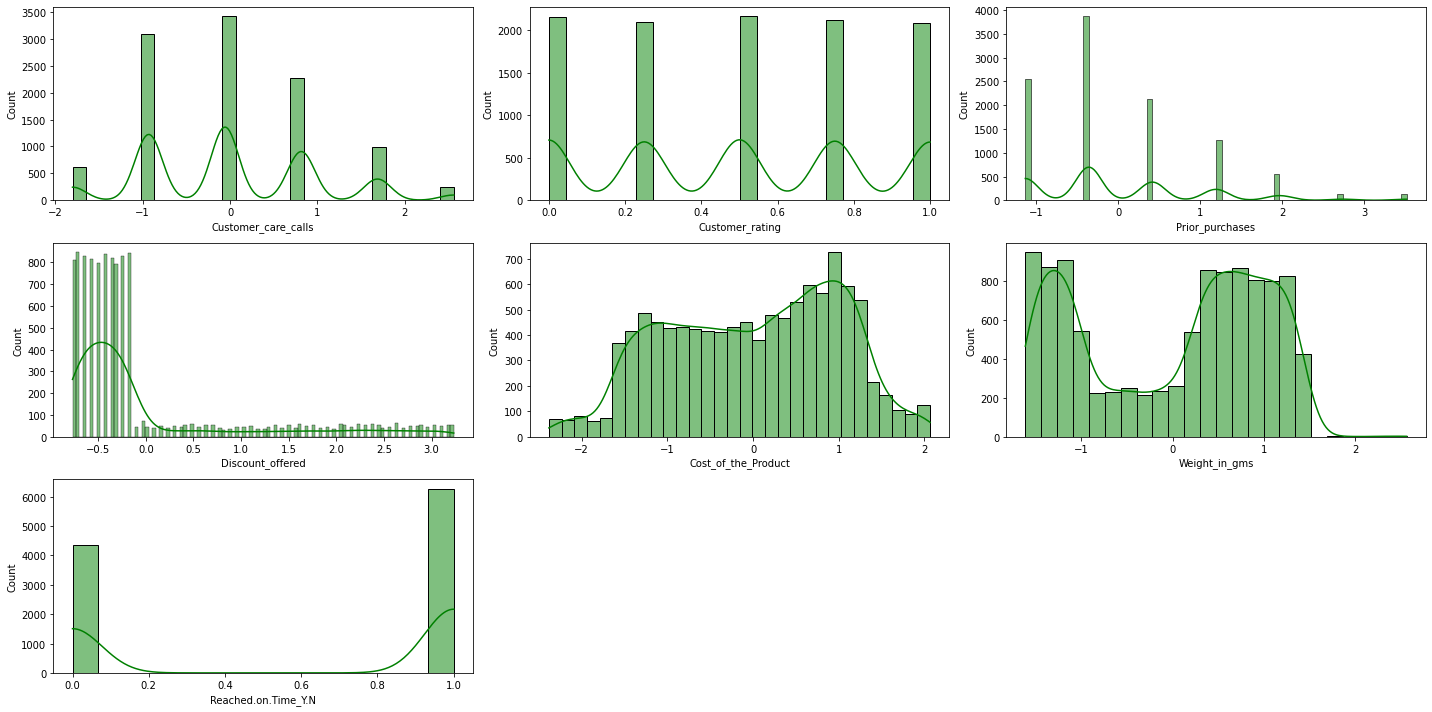

In [16]:
features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x=df2[features[i]], kde=True, color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

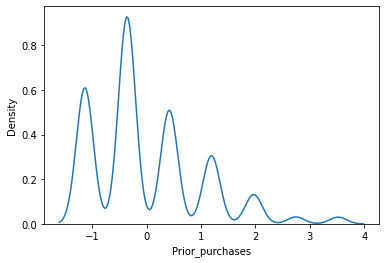

In [17]:
sns.kdeplot(df2['Prior_purchases']);

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


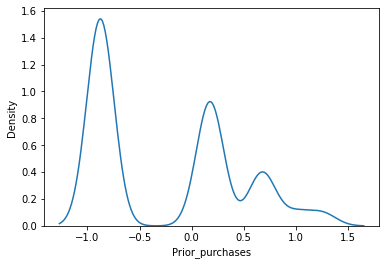

In [18]:
sns.kdeplot(np.log(df2['Prior_purchases']));

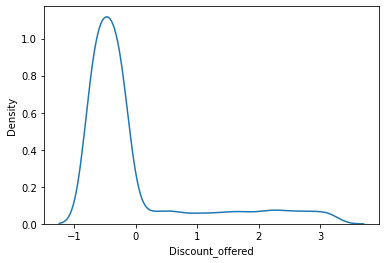

In [19]:
sns.kdeplot(df2['Discount_offered']);

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


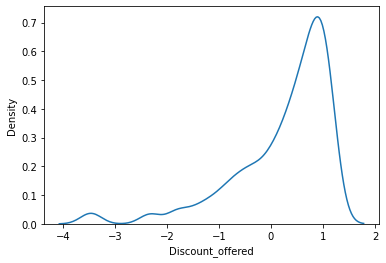

In [20]:
sns.kdeplot(np.log(df2['Discount_offered']));

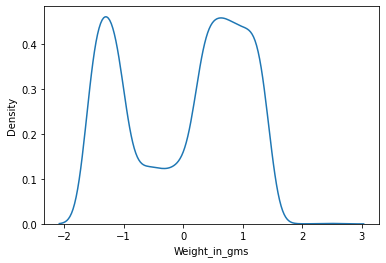

In [21]:
sns.kdeplot(df2['Weight_in_gms']);

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


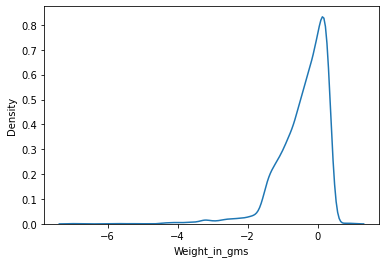

In [22]:
sns.kdeplot(np.log(df2['Weight_in_gms']));

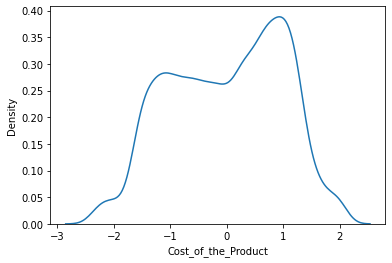

In [23]:
sns.kdeplot(df2['Cost_of_the_Product']);

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


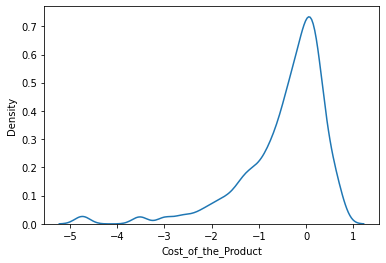

In [24]:
sns.kdeplot(np.log(df2['Cost_of_the_Product']));

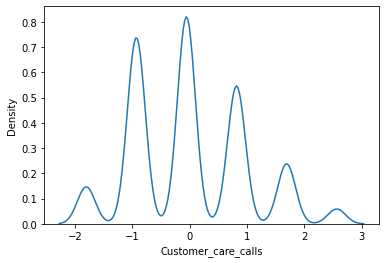

In [25]:
sns.kdeplot(df2['Customer_care_calls']);

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


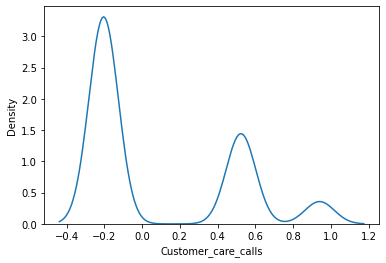

In [26]:
sns.kdeplot(np.log(df2['Customer_care_calls']));

In [27]:
df2['log_prior_purchases'] = np.log(df2['Prior_purchases'])
df2['log_discount_offered'] = np.log(df2['Discount_offered'])
df2['log_weight_in_gms'] = np.log(df2['Weight_in_gms'])
df2['log_cost_of_the_Product'] = np.log(df2['Cost_of_the_Product'])
df2['log_customer_care_calls'] = np.log(df2['Customer_care_calls'])

df2 = df2.drop(columns=['ID', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms','Cost_of_the_Product', 'Customer_care_calls'])
df2.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Customer_rating,Reached.on.Time_Y.N,log_prior_purchases,log_discount_offered,log_weight_in_gms,log_cost_of_the_Product,log_customer_care_calls
count,10642.000000,10642.000000,4212.000000,2304.000000,6145.000000,5573.000000,3521.000000
mean,0.497298,0.590303,-0.232526,0.224030,-0.425354,-0.464535,0.081788
std,0.353086,0.491801,0.694371,0.952796,0.724980,0.914966,0.399492
min,0.000000,0.000000,-0.876297,-3.459681,-7.006352,-4.736844,-0.203601
25%,0.250000,0.000000,-0.876297,-0.184072,-0.764418,-0.808381,-0.203601
50%,0.500000,1.000000,-0.876297,0.530048,-0.252014,-0.198464,-0.203601
75%,0.750000,1.000000,0.175834,0.916071,0.101796,0.142193,0.524093
max,1.000000,1.000000,1.258460,1.173467,0.940405,0.726594,0.940814


There are some changes of some features to approach normal distribution with log transformation such as `Prior_purchases`, `Discount_offered`, `Weight_in_gms`, `Cost_of_the_Product` , `Customer_care_calls`

# **Feature encoding**

In [28]:
cats_updated = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

value counts of column Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
------------------------------ 

value counts of column Gender
F    5545
M    5454
Name: Gender, dtype: int64
------------------------------ 

value counts of column Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
------------------------------ 



Encoding technique

* Product_importance & Gender \: Label Encoding
* Mode_of_Shipment & Warehouse_block \: One Hot Encoding

In [29]:
# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

df['Product_importance'] = df['Product_importance'].map(mapping_Product_importance)
df['Gender'] = df['Gender'].map(mapping_Gender)

In [30]:
# One Hot Encoder
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [31]:
# drop kolom yang di encoding menggunakan OHE : 'Mode_of_Shipment' & 'Warehouse_block'
df = df.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [32]:
df.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,1,4,2,177,3,0,0,44,1233,1,1,0,0,0,0,0,1,0
1,2,4,5,216,2,0,1,59,3088,1,1,0,0,0,0,0,0,1
2,3,2,2,183,4,0,1,48,3374,1,1,0,0,1,0,0,0,0
3,4,3,3,176,4,1,1,10,1177,1,1,0,0,0,1,0,0,0
4,5,2,2,184,3,1,0,46,2484,1,1,0,0,0,0,1,0,0


* **Label encoding** : converts distinct values to a specified value. Used on categorical data with the number of distinct values = 2 or data in ordinal form (can be sorted)
* **One hot encoding**: converts distinct values into separate features. Used on nominal data(cannot be sorted)

**Handle class imbalance**

In [33]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

The prediction target ratio is quite balanced, so there is no need for over/undersampling

# **Feature Engineering**
**Feature selection**

In [34]:
dfSel.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


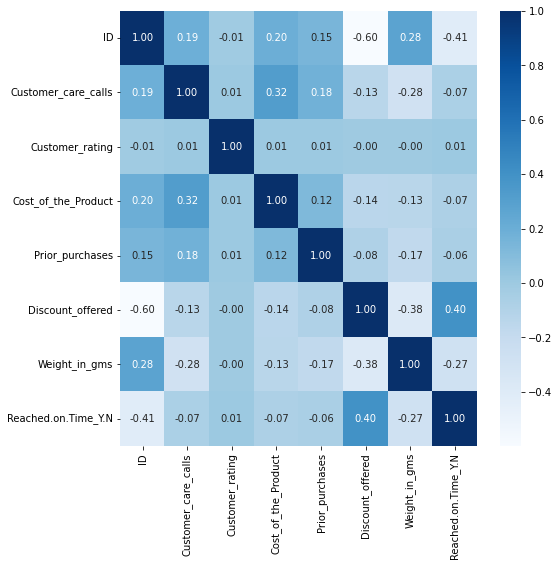

In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(dfSel.corr(), cmap='Blues', annot=True, fmt='.2f');

From the figure above, some features that passed the threshold (0,05) according to the targeted feature (Reached.on.Time_Y.N) are chosen to be processed, such as Customer_care_calls, Cost_of_the_Products, Prior_Purchases, Discount_offered, and Weight_in_grms

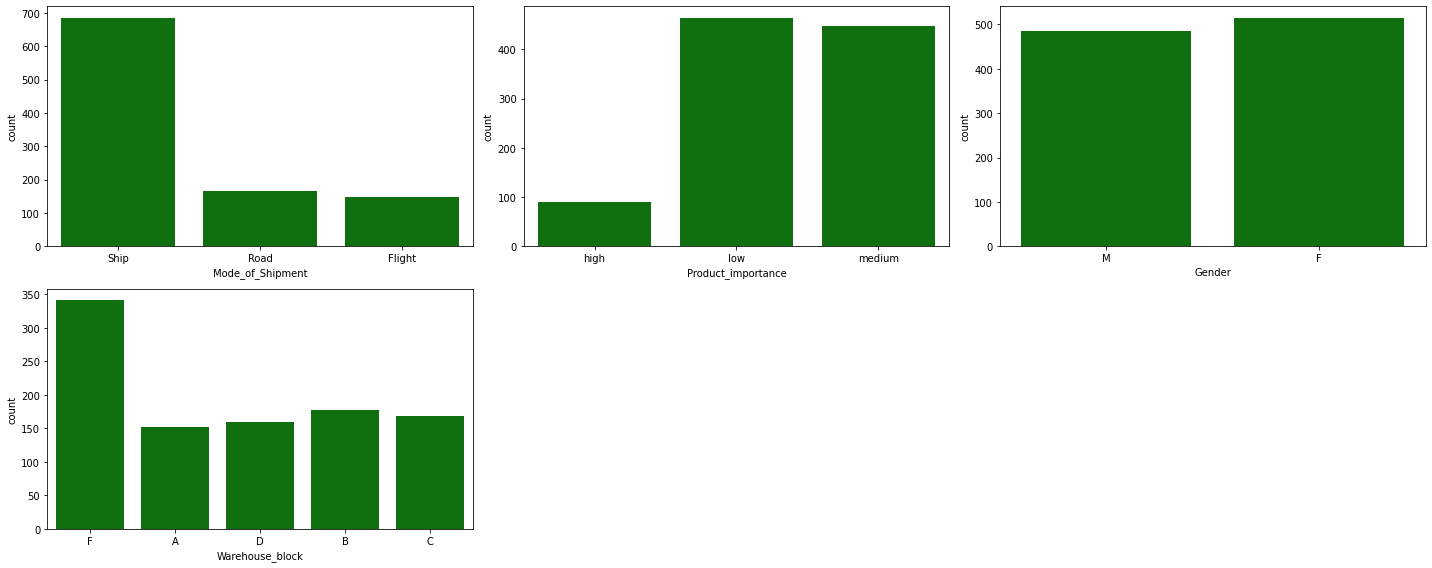

In [36]:
df_sample = dfSel.sample(1000, random_state=42)
plt.figure(figsize=(20,8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color='green', orient='v')
    plt.tight_layout()

From the figure above can be seen that all features have a quite bigdifference in terms of sum in counts, except Gender, that features is excluded because have the same numbers in counts

**Feature extraction**

In [37]:
#code

data_clean['performance_warehouse'] = np.where(
    (
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='A') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='B') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='C') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='D') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='F') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
"Best",
    np.where((
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 0)) | 
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
    "Better",
    np.where(
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 0)) | 
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 0)) | 
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 1)) | 
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 1)) | 
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 1)),
        "Good","Low"
    )
    )
)

In [38]:
print(data_clean['performance_warehouse'].value_counts())

Good      5297
Better    4754
Best       948
Name: performance_warehouse, dtype: int64


In [39]:
warehouse_probs = data_clean.groupby(['performance_warehouse', 'Reached.on.Time_Y.N']).agg({
    'Product_importance': ['count']
}).reset_index()

warehouse_probs.columns = ['performance_warehouse', 'Reached.on.Time_Y.N','on time']

warehouse_probs = pd.pivot_table(warehouse_probs,
                             index = 'performance_warehouse',
                             columns = 'Reached.on.Time_Y.N',
                             values = 'on time').reset_index()

warehouse_probs.columns = ['performance_warehouse','on.Time','not_on.Time']
warehouse_probs['warehouse_probs'] = (warehouse_probs['on.Time']/(warehouse_probs['not_on.Time']+warehouse_probs['on.Time']))*100
warehouse_probs = warehouse_probs.sort_values('warehouse_probs', ascending=False).reset_index(drop=True)
warehouse_probs.head()

,performance_warehouse,on.Time,not_on.Time,warehouse_probs
0,Better,1947,2807,40.954985
1,Good,2157,3140,40.721163
2,Best,332,616,35.021097


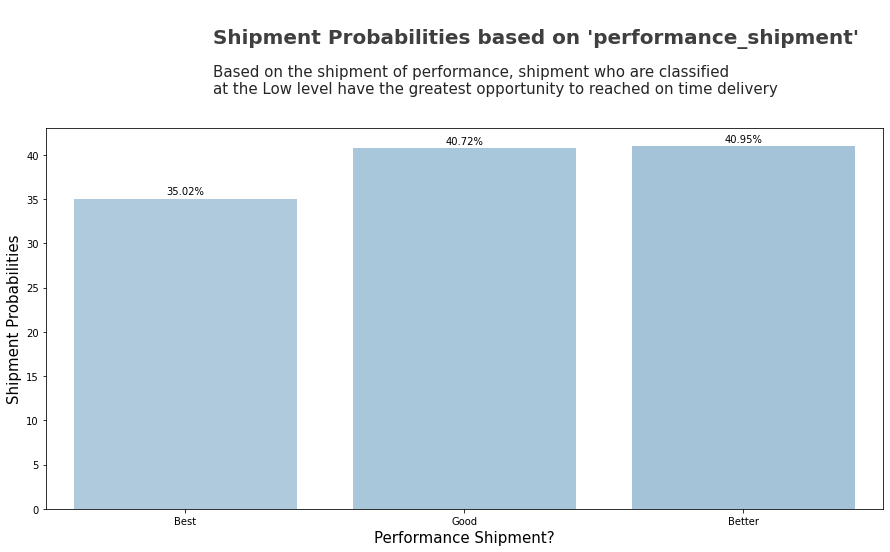

In [40]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='performance_warehouse', y='warehouse_probs', data=warehouse_probs,
                order=warehouse_probs.sort_values('warehouse_probs',ascending = True).performance_warehouse,
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Shipment Probabilities based on 'performance_shipment'
'''

text = '''
Based on the shipment of performance, shipment who are classified
at the Low level have the greatest opportunity to reached on time delivery
'''

#plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Performance Shipment?', fontsize = 15) # Add the x-label
plt.ylabel('Shipment Probabilities', fontsize = 15) # Add the y-label

plt.text(x = 0.1, y = 50, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0.1, y = 45, s=text,
        fontsize = 15, alpha = .85);

In [41]:
data_clean['performance_shipment'] = np.where(
    (
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] =='Road') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] =='Ship') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] =='Flight') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
"Best",
    np.where((
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 0)) | 
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
    "Better",
    np.where(
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 0)) | 
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 1)) | 
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 1)),
        "Good","Low"
    )
    )
)

In [42]:
perform_probs = data_clean.groupby(['performance_shipment', 'Reached.on.Time_Y.N']).agg({
    'Product_importance': ['count']
}).reset_index()

perform_probs.columns = ['performance_shipment', 'Reached.on.Time_Y.N','on time']

perform_probs = pd.pivot_table(perform_probs,
                             index = 'performance_shipment',
                             columns = 'Reached.on.Time_Y.N',
                             values = 'on time').reset_index()

perform_probs.columns = ['performance_shipment','on.time','not_on.time']
perform_probs['total_on.time'] = perform_probs['not_on.time'] + perform_probs['on.time']
perform_probs['shipment_probs'] = (perform_probs['on.time']/(perform_probs['not_on.time']+perform_probs['on.time']))*100
perform_probs = perform_probs.sort_values('shipment_probs', ascending=False).reset_index(drop=True)
perform_probs

,performance_shipment,on.time,not_on.time,total_on.time,shipment_probs
0,Low,1814,2586,4400,41.227273
1,Better,886,1303,2189,40.475103
2,Good,882,1357,2239,39.392586
3,Best,854,1317,2171,39.336711


In [43]:
df_warehouse = data_clean.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).agg({'ID' : 'count'}).reset_index()
df_warehouse.columns = ['Warehouse', 'Reached.on.Time_Y.N', 'Count']
df_warehouse['Total_Warehouse'] = df_warehouse.groupby(['Warehouse'])['Count'].transform('sum')
df_warehouse['Persen'] = round(df_warehouse['Count']/df_warehouse['Total_Warehouse']*100,2)
df_warehouse

,Warehouse,Reached.on.Time_Y.N,Count,Total_Warehouse,Persen
0,A,0,758,1833,41.35
1,A,1,1075,1833,58.65
2,B,0,729,1833,39.77
3,B,1,1104,1833,60.23
4,C,0,739,1833,40.32
5,C,1,1094,1833,59.68
6,D,0,738,1834,40.24
7,D,1,1096,1834,59.76
8,F,0,1472,3666,40.15
9,F,1,2194,3666,59.85


In [44]:
df_rating = data_clean.groupby(['Customer_rating', 'Reached.on.Time_Y.N']).agg({'ID' : 'count'}).reset_index()
df_rating.columns = ['Rating', 'Reached.on.Time_Y.N', 'Count']
df_rating['Total Rating'] = df_rating.groupby(['Rating'])['Count'].transform('sum')
df_rating['Persen'] = round(df_rating['Count']/df_rating['Total Rating']*100,2)
df_rating

,Rating,Reached.on.Time_Y.N,Count,Total Rating,Persen
0,1,0,922,2235,41.25
1,1,1,1313,2235,58.75
2,2,0,892,2165,41.20
3,2,1,1273,2165,58.80
4,3,0,882,2239,39.39
5,3,1,1357,2239,60.61
6,4,0,886,2189,40.48
7,4,1,1303,2189,59.52
8,5,0,854,2171,39.34
9,5,1,1317,2171,60.66


In [45]:
df_importance = data_clean.groupby(['Product_importance', 'Reached.on.Time_Y.N']).agg({'ID' : 'count' }).reset_index()
df_importance.columns = ['Importance', 'Reached.on.Time_Y.N', 'Count']
df_importance['Total importance'] = df_importance.groupby(['Importance'])['Count'].transform('sum')
df_importance['Persen'] = round(df_importance['Count'] / df_importance['Total importance'] * 100, 2)
df_importance

,Importance,Reached.on.Time_Y.N,Count,Total importance,Persen
0,high,0,332,948,35.02
1,high,1,616,948,64.98
2,low,0,2157,5297,40.72
3,low,1,3140,5297,59.28
4,medium,0,1947,4754,40.95
5,medium,1,2807,4754,59.05


In [46]:
df_purchase = data_clean.groupby(['Prior_purchases', 'Reached.on.Time_Y.N']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['Purchase', 'Reached.on.Time_Y.N', 'Count']
df_purchase['Total purchase'] = df_purchase.groupby(['Purchase'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total purchase'] * 100, 2)
df_purchase

,Purchase,Reached.on.Time_Y.N,Count,Total purchase,Percentage
0,2,0,974,2599,37.48
1,2,1,1625,2599,62.52
2,3,0,1421,3955,35.93
3,3,1,2534,3955,64.07
4,4,0,984,2155,45.66
5,4,1,1171,2155,54.34
6,5,0,645,1287,50.12
7,5,1,642,1287,49.88
8,6,0,247,561,44.03
9,6,1,314,561,55.97


In [47]:
# Discount Late Frequency 
df_discount = data_clean[['Discount_offered','Reached.on.Time_Y.N']]
Discount_Group = []

for index, kolom in df_discount.iterrows():
    if kolom['Discount_offered']>=0 and kolom['Discount_offered']<=10:
        Discount_Group.append('1 - 10')
    elif kolom['Discount_offered']>=11 and kolom['Discount_offered']<=20:
        Discount_Group.append('11 - 20')
    elif kolom['Discount_offered']>=21 and kolom['Discount_offered']<=30:
        Discount_Group.append('21 - 30')    
    else:
        Discount_Group.append('> 30')

        
df_discount['Discount_Group'] = Discount_Group
df_discount = df_discount.groupby(['Discount_Group','Reached.on.Time_Y.N'])['Discount_offered'].count().reset_index()
df_discount.columns = ['Discount_Group', 'Late', 'SubTotal']
df_discount['Total'] = df_discount.groupby('Discount_Group')['SubTotal'].transform('sum')
df_discount['Persentase'] = round((df_discount['SubTotal'] / (df_discount['Total']))*100,2)
df_discount

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Discount_Group,Late,SubTotal,Total,Persentase
0,1 - 10,0,4436,8352,53.11
1,1 - 10,1,3916,8352,46.89
2,11 - 20,1,496,496,100.00
3,21 - 30,1,441,441,100.00
4,> 30,1,1710,1710,100.00


In [48]:
df_weight = data_clean[['Weight_in_gms','Reached.on.Time_Y.N']]
Weight_Group = []

for index, kolom in df_weight.iterrows():
    if kolom['Weight_in_gms']>=0 and kolom['Weight_in_gms']<=2000:
        Weight_Group.append('0 sd 2000')
    elif kolom['Weight_in_gms']>=2001 and kolom['Weight_in_gms']<=4000:
        Weight_Group.append('2001 sd 4000')    
    else:
        Weight_Group.append('4001 sd 6000')

        
df_weight['Weight_Group'] = Weight_Group
df_weight = df_weight.groupby(['Weight_Group','Reached.on.Time_Y.N'])['Weight_in_gms'].count().reset_index()
df_weight.columns = ['Weight_Group', 'Late', 'SubTotal']
df_weight['Total'] = df_weight.groupby('Weight_Group')['SubTotal'].transform('sum')
df_weight['Percentage'] = round((df_weight['SubTotal'] / df_weight['Total']) * 100, 2)
df_weight

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Weight_Group,Late,SubTotal,Total,Percentage
0,0 sd 2000,0,1046,3245,32.23
1,0 sd 2000,1,2199,3245,67.77
2,2001 sd 4000,0,1,1788,0.06
3,2001 sd 4000,1,1787,1788,99.94
4,4001 sd 6000,0,3389,5966,56.81
5,4001 sd 6000,1,2577,5966,43.19


Additional features
4 additional features that might really help make the model's performance even better:

1. Date time - In order to know the departure time of the package
2. Destination - To know the destination of the package
3. Type of package - In order to know the type of package to be sent
4. Distance - In order to know the distance of delivery of goods